In [35]:
using FFTW, LinearAlgebra
using BenchmarkTools
using Plots
gr()

Plots.GRBackend()

In [63]:
include("src/dataset.jl")
include("src/micmac.jl")
include("src/error.jl")
include("src/ref_data.jl")

read_refdata (generic function with 1 method)

In [64]:
dataset  = 3
xmin     = 0
xmax     = 2π
T        = 2π
nx       = 64
ntau     = 32
tfinal   = 0.25
epsilon  = 0.1

data = DataSet(dataset, xmin, xmax, nx, epsilon, tfinal)

dt = 2.0^(-3) * tfinal / 16

m = MicMac(data, ntau)

@time u, v = solve(m, dt)

compute_error(u, v, epsilon, dataset)

  5.369288 seconds (4.63 M allocations: 1.013 GiB, 3.87% gc time)


1.1063217135716874

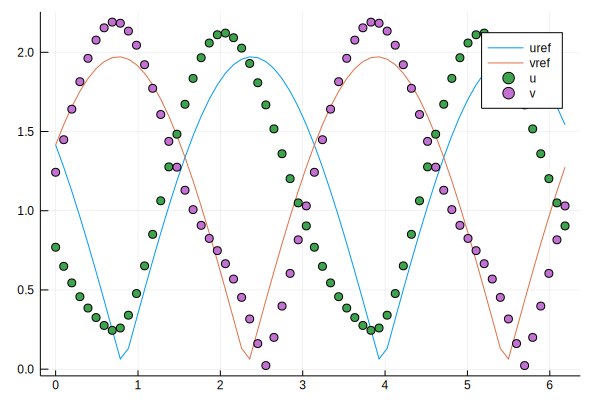

In [71]:
uref, vref = read_refdata( epsilon, dataset)
            
plot( data.x, abs.(uref), label=:uref)
plot!( data.x, abs.(vref), label=:vref)
scatter!(data.x, abs.(vec(u)), label=:u)
scatter!(data.x, abs.(vec(v)), label=:v)